# 데이터 불러오기

In [1]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
display(competitor)
# 고객DEMO
pp_demo = pd.read_pickle("../../DATA_preprocessed/pp_demo.pickle")
display(pp_demo)
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
display(member)
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
display(channel)

# 상금 거래 관련
pp_purprd_prodcl = pd.read_pickle('../../DATA_preprocessed/pp_purprd_prodcl.pickle')
pp_purprd_prodcl

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도
...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구
19379,19380,F,20세~24세,서울특별시 마포구
19380,19381,F,40세~44세,부산광역시
19381,19382,F,45세~49세,부산광역시


,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가


# EDA

# 반기별 방문 변동성 확인

## 반기 컬럼 생성

In [107]:
# 반기로 데이터 짜르기
cond_2014_1 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']<7)
cond_2014_2 =(pp_purprd_prodcl['구매_연']==2014)&(pp_purprd_prodcl['구매_월']>=7)
cond_2015_1 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']<7)
cond_2015_2 =(pp_purprd_prodcl['구매_연']==2015)&(pp_purprd_prodcl['구매_월']>=7)

pp_purprd_prodcl['반기']=0

pp_purprd_prodcl.loc[cond_2014_1,'반기']='2014_1'
pp_purprd_prodcl.loc[cond_2014_2,'반기']='2014_2'
pp_purprd_prodcl.loc[cond_2015_1,'반기']='2015_1'
pp_purprd_prodcl.loc[cond_2015_2,'반기']='2015_2'

pp_purprd_prodcl

,고객번호,제휴사,영수증번호,점포코드,구매_연,구매_월,구매_일,구매시간,소분류코드,구매금액,대분류명,대중분류명,중분류명,제휴사_중분류명,소분류명,TYPE,lev,반기
0,1,A,1182697,12,2014,1,8,14,A010302,4800,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
1,1,A,1239229,12,2014,1,18,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
2,1,A,1307657,12,2014,1,30,11,A010302,3900,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
3,1,A,1402358,12,2014,2,18,16,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
4,1,A,1456379,12,2014,2,28,15,A010302,3500,식품,유제품,축산가공,A축산가공,유제품,편의품,중가,2014_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437049,18697,C,631324,29,2014,5,30,21,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,2014_1
28437050,18697,C,631629,29,2014,7,20,15,C060405,2300,식품,즉석식품,베이커리,C베이커리,페스츄리류,편의품,중가,2014_2
28437051,18710,C,1073027,75,2015,1,22,12,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,2015_1
28437052,18710,C,1073138,75,2015,1,29,21,C030312,7990,식품,채소류,근채류,C근채류,기타한방약재,편의품,고가,2015_1


## 고객별 반기별 방문 변동성 지수 생성

In [108]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)
pp_pv

반기,2014_1,2014_2,2015_1,2015_2
고객번호,,,,
1,238,356,312,151
2,339,271,261,245
3,348,391,220,232
4,270,172,263,225
5,377,130,123,89
...,...,...,...,...
19379,0,87,262,235
19380,0,17,103,320
19381,0,0,369,436


In [114]:
pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1'])*1\
                    + (pp_pv['2015_1']-pp_pv['2014_2'])*2\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*3)\
                    / (np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))
pp_pv_=pp_pv['방문_변동지수'].reset_index()
pp_demo_f = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_f

,고객번호,성별,연령대,거주지역,제휴사,방문_변동지수
0,1,M,60세이상,서울특별시 강남구,A,-0.752192
1,1,M,60세이상,서울특별시 강남구,B,-0.049324
2,1,M,60세이상,서울특별시 강남구,C,-0.129476
3,2,M,60세이상,경기도,A,-0.246620
4,2,M,60세이상,경기도,B,-0.032883
...,...,...,...,...,...,...
58438,19382,F,45세~49세,부산광역시,C,0.018497
58439,19383,F,25세~29세,경상남도,A,0.110979
58440,19383,F,25세~29세,경상남도,B,0.098648
58441,19383,F,25세~29세,경상남도,C,0.018497


### 방문_변동성지수가 양수인 고객 비율

In [115]:
print(f'방문_변동성지수가 양수인 고객 비율 : {len(pp_demo_f[pp_demo_f["방문_변동지수"]>0])/len(pp_demo_f)*100:.2f}%')

# 가중치 2 : 1.5 : 1 인 경우
# 방문_변동성지수가 양수인 고객 비율 : 53.24%
# 가중치 3 : 2 : 1 인 경우 :  최근 방문 비율이 증가한 손님들에게 더 큰 가중치 부여
# 방문_변동성지수가 양수인 고객 비율 : 45.60%

# 최근 방문이 증가한 손님들에게 더 큰 가중치 점술를 부여한 결과 부정적인 결과를 얻음
# 손님들의 최근 방문빈도 증거율이 줄어들고 있다.

방문_변동성지수가 양수인 고객 비율 : 45.60%


## 고객별 제휴사별 반기별 방문_변동성 지수 생성

In [111]:
pp_pv = pp_purprd_prodcl.pivot_table(index=['고객번호','제휴사'],columns='반기',values='구매금액',aggfunc=('count'),fill_value=0)

pp_pv['방문_변동지수'] = ((pp_pv['2014_2']-pp_pv['2014_1'])*1\
                    + (pp_pv['2015_1']-pp_pv['2014_2'])*2\
                    + (pp_pv['2015_2']-pp_pv['2015_1'])*3)\
                    / (np.mean(pp_pv['2014_1']+pp_pv['2014_2']+pp_pv['2015_1']+pp_pv['2015_2']))

pp_pv_=pp_pv['방문_변동지수'].unstack().reset_index()
pp_demo_f = pd.merge(pp_demo,pp_pv_,on='고객번호')
pp_demo_f

,고객번호,성별,연령대,거주지역,A,B,C,D
0,1,M,60세이상,서울특별시 강남구,-0.752192,-0.049324,-0.129476,NaN
1,2,M,60세이상,경기도,-0.246620,-0.032883,NaN,0.000000
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.004110,-0.534344,NaN
3,4,F,60세이상,서울특별시 노원구,-0.051379,0.012331,-0.022607,NaN
4,5,M,60세이상,경기도,-0.754248,-0.002055,NaN,0.010276
...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.055490,0.022607,-0.045214,0.698758
19379,19380,F,20세~24세,서울특별시 마포구,0.018497,0.026717,0.258952,1.422178
19380,19381,F,40세~44세,부산광역시,0.014386,1.859929,0.055490,NaN
19381,19382,F,45세~49세,부산광역시,-0.008221,2.303846,0.018497,NaN


### 제휴사별 방문_변동성지수가 양수인 고객 비율

In [112]:
for i in ['A','B','C','D']:
    instance = pp_demo_f[i]
    instance = instance.dropna()
    print(f'제휴사 {i}의 방문_변동성지수가 양수인 고객 비율 : {len(instance[instance>0])/len(instance)*100:.2f}%')

# 가중치 2 : 1.5 : 1 인 경우
# 제휴사 A의 방문_변동성지수가 양수인 고객 비율 : 47.13%
# 제휴사 B의 방문_변동성지수가 양수인 고객 비율 : 49.39%
# 제휴사 C의 방문_변동성지수가 양수인 고객 비율 : 41.39%
# 제휴사 D의 방문_변동성지수가 양수인 고객 비율 : 57.01%
# 가중치 3 : 2 : 1 인 경우 :  최근 방문 비율이 증가한 손님들에게 더 큰 가중치 부여
# 제휴사 A의 방문_변동성지수가 양수인 고객 비율 : 46.05%
# 제휴사 B의 방문_변동성지수가 양수인 고객 비율 : 47.75%
# 제휴사 C의 방문_변동성지수가 양수인 고객 비율 : 40.50%
# 제휴사 D의 방문_변동성지수가 양수인 고객 비율 : 55.79%

# 최근 방문이 증가한 손님들에게 더 큰 가중치 점술를 부여한 결과 부정적인 결과를 얻음
# 손님들의 최근 방문빈도 증거율이 줄어들고 있다.

제휴사 A의 방문_변동성지수가 양수인 고객 비율 : 46.05%
제휴사 B의 방문_변동성지수가 양수인 고객 비율 : 47.75%
제휴사 C의 방문_변동성지수가 양수인 고객 비율 : 40.50%
제휴사 D의 방문_변동성지수가 양수인 고객 비율 : 55.79%


### 방문_변동성 지수를 이용한 고객별 제휴사별 방문등급 산정

In [56]:
# 방문 변동지수 인원 배분 15 20 30 20 15 퍼센트로 총 다섯 등급으로 나누기
visit_lev = {}
for i in ['A','B','C','D']:
    instance = pp_demo_f[i]
    instance = instance.dropna()
    visit_lev_list=[]
    for j in [15,35,65,85]:
        visit_lev_list.append(np.percentile(instance,j))
    visit_lev[i] = visit_lev_list

visit_lev

{'A': [-0.10481370538593765,
  -0.009248268122288617,
  0.012331024163051488,
  0.10070336399825383],
 'B': [-0.18188260640500947,
  -0.021579292285340106,
  0.049324096652205954,
  0.2938894092193938],
 'C': [-0.10584129073285861,
  -0.012331024163051488,
  0.008220682775367659,
  0.12844816836511969],
 'D': [-0.0041103413876838295,
  -0.0010275853469209574,
  0.008220682775367659,
  0.022606877632261064]}

In [58]:
def make_visit_lev(x,y):
    if x > visit_lev[y][3]:  # 상위 15%
        return 5
    elif x > visit_lev[y][2]:  # 상위 35%
        return 4
    elif x > visit_lev[y][1]:  # 상위 65%
        return 3
    elif x > visit_lev[y][0]:  # 상위 85%
        return 2
    else:  # 하위 15% and 해당 제휴사 매장에 방문 기록이 없는 고객
        return 1

    
pp_demo_f['방문등급_A'] = pp_demo_f.apply(lambda row: make_visit_lev(row['A'],'A'),axis=1)
pp_demo_f['방문등급_B'] = pp_demo_f.apply(lambda row: make_visit_lev(row['B'],'B'),axis=1)
pp_demo_f['방문등급_C'] = pp_demo_f.apply(lambda row: make_visit_lev(row['C'],'C'),axis=1)
pp_demo_f['방문등급_D'] = pp_demo_f.apply(lambda row: make_visit_lev(row['D'],'D'),axis=1)
pp_demo_f

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1


### 고객별 최종방문점수 산정

In [59]:
pp_demo_f['최종방문점수'] = pp_demo_f.iloc[:,-4:].sum(axis=1)
pp_demo_f

,고객번호,성별,연령대,거주지역,A,B,C,D,방문등급_A,방문등급_B,방문등급_C,방문등급_D,최종방문점수
0,1,M,60세이상,서울특별시 강남구,-0.481938,-0.015414,-0.057545,NaN,1,3,2,1,7
1,2,M,60세이상,경기도,-0.224014,-0.017469,NaN,0.005138,1,3,1,3,8
2,3,M,60세이상,서울특별시 은평구,-0.002055,-0.002055,-0.385345,NaN,3,3,1,1,8
3,4,F,60세이상,서울특별시 노원구,-0.071931,0.024662,-0.029800,NaN,2,3,2,1,8
4,5,M,60세이상,경기도,-0.675124,-0.002055,NaN,0.008221,1,3,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,서울특별시 동작구,0.043159,0.021579,-0.022607,0.565172,4,3,2,5,14
19379,19380,F,20세~24세,서울특별시 마포구,0.012331,0.018497,0.172634,0.988537,3,3,5,5,16
19380,19381,F,40세~44세,부산광역시,0.010276,1.365661,0.036993,NaN,3,5,4,1,13
19381,19382,F,45세~49세,부산광역시,-0.004110,1.670854,0.012331,NaN,3,5,4,1,13


### 시각화

#### 최종방문 점수 히스토그램

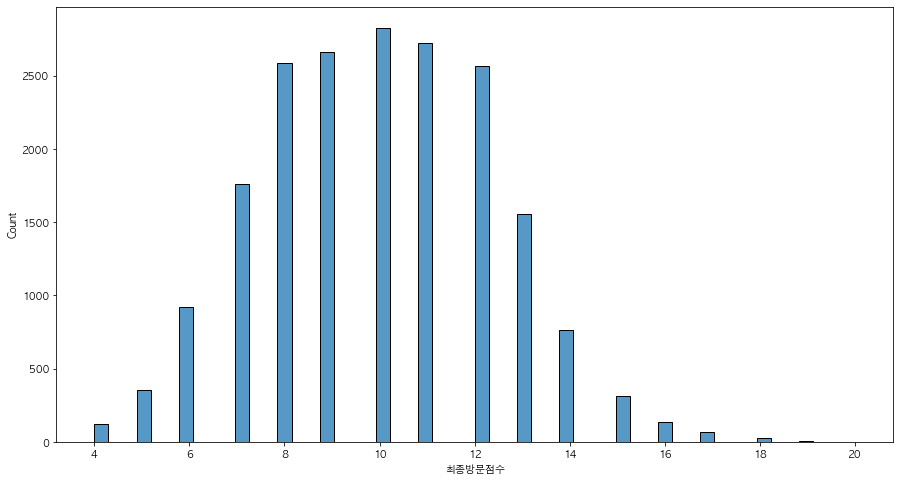

In [77]:
plt.figure(figsize=(15,8))
sns.histplot(pp_demo_f['최종방문점수'])
plt.show()

#### 제휴사별 방문등급 히스토그램

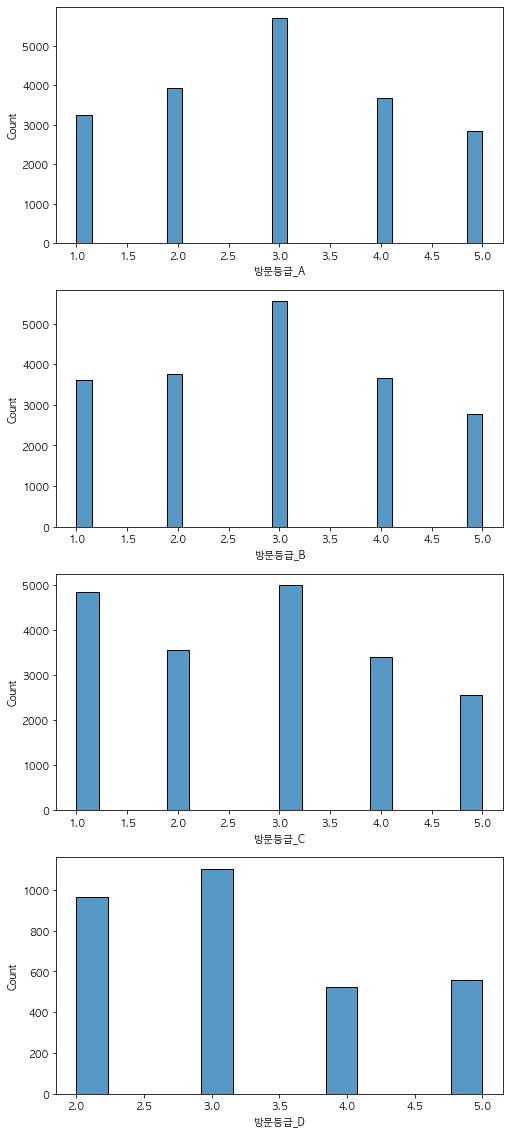

In [76]:
plt.figure(figsize=(8,20))
plt.subplot(4, 1, 1) 
sns.histplot(pp_demo_f['방문등급_A'])
plt.subplot(4, 1, 2) 
sns.histplot(pp_demo_f['방문등급_B'])
plt.subplot(4, 1, 3) 
sns.histplot(pp_demo_f['방문등급_C'])
plt.subplot(4, 1, 4)
sns.histplot(pp_demo_f['방문등급_D'][pp_demo_f['방문등급_D']!=1])

plt.show()